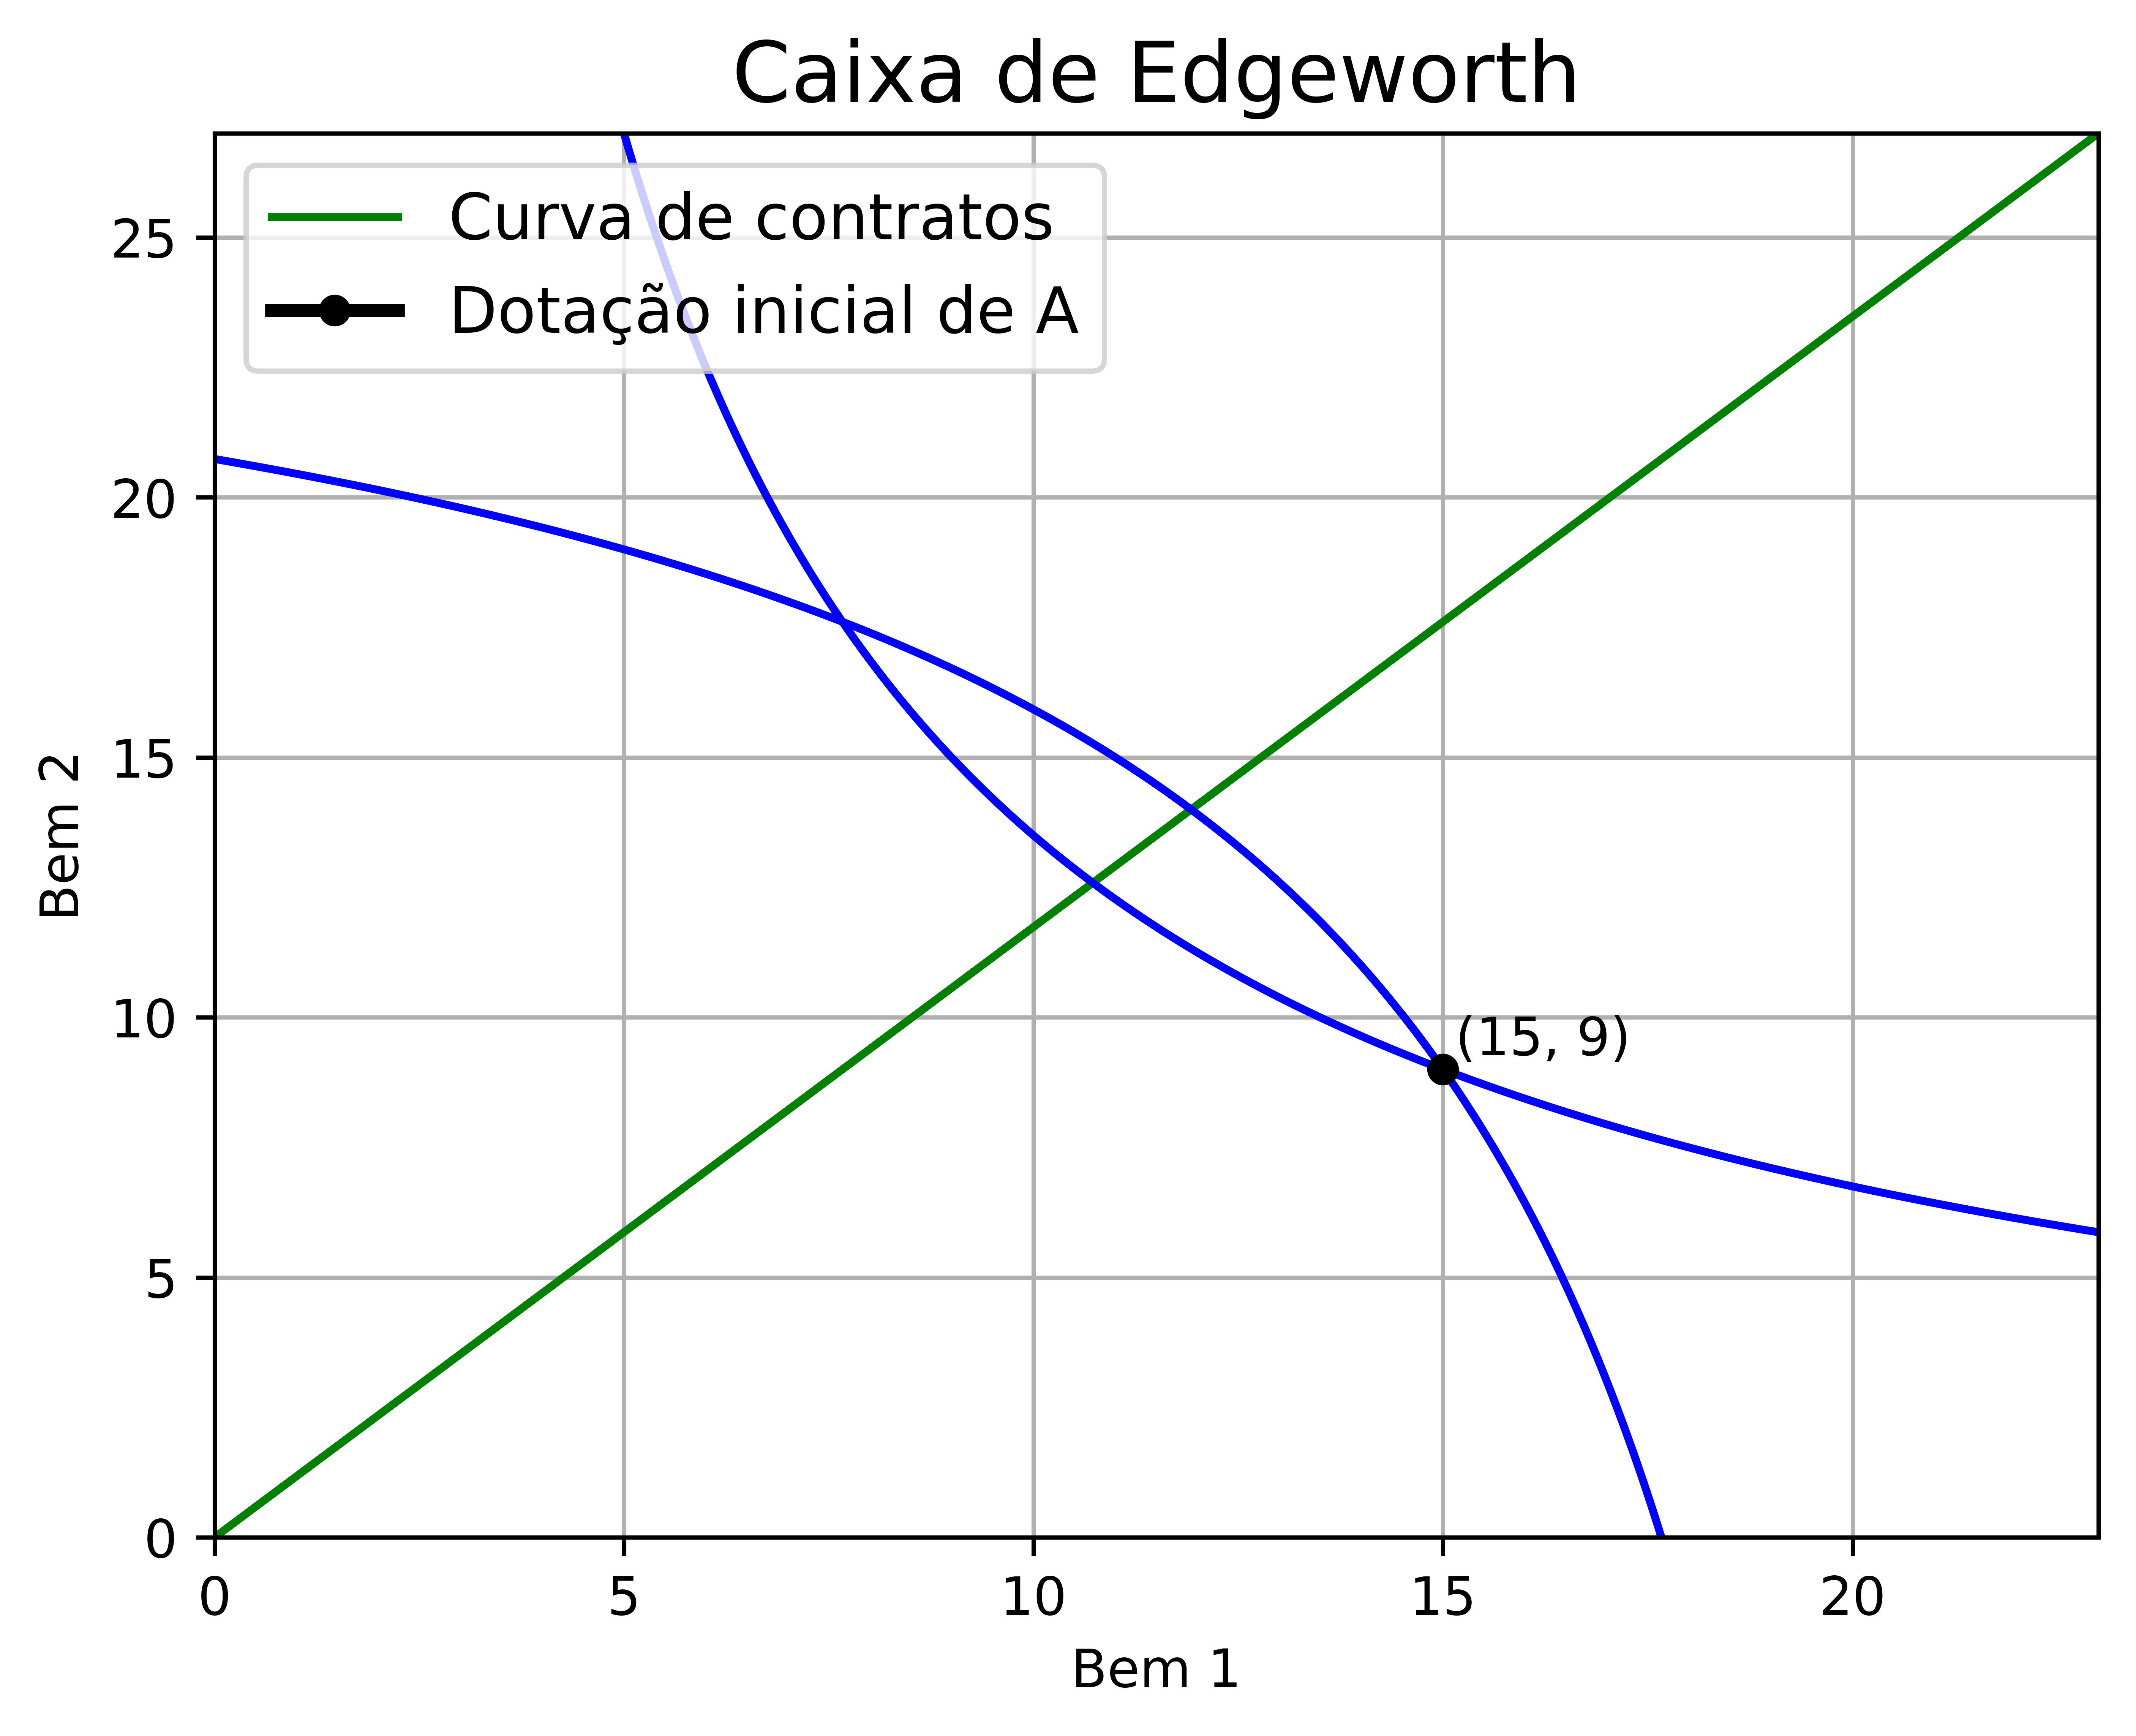

In [1]:
# Importa os módulos necessários
import matplotlib.pyplot as plt
import numpy as np

# Cria a dotação inicial de cada bem para cada consumidor
xa1 = 15 # Quantidade do bem 1 do consumidor A
xa2 = 9 # Quantidade do bem 2 do consumidor A
xb1 = 8 # Quantidade do bem 1 do consumidor B
xb2 = 18 # Quantidade do bem 2 do consumidor B
w1 = xa1 + xb1 # Quantidade total do bem 1
w2 = xa2 + xb2 # Quantidade total do bem 2
alpha = 0.5 # Expoente da Cobb-Douglas
beta = 1 - alpha # Outro expoente da Cobb-Douglas

assert xa1 >= 0 and xa2 >= 0 and xb1 >= 0 and xb2 >= 0, w1 > 0 and w2 > 0 and 0 < alpha < 1

# Cria os grids
grid1 = np.linspace(0.0001, w1, 1000)
grid2 = np.linspace(0.0001, w2, 1000)
    
# Cria a função de utilidade Cobb-Douglas (mesma para A e B)
utilidade = lambda x1, x2: (x1 ** alpha) * (x2 ** beta)

# Cria a curva de contratos
curva_contratos = []

for g1 in grid1:
    curva_contratos.append((w2 * g1) / w1) # Para chegar nesse valor, igualamos a TMS de A e B e substituímos as restrições
    
# Cria um plano cartesiano usando os dois vetores
vetor1, vetor2 = np.meshgrid(grid1, grid2)

# Calcula a utilidade nos pontos do grid
uti_a = utilidade(vetor1, vetor2)
uti_b = utilidade(w1 - vetor1, w2 - vetor2)

# Calcula a utilidade na dotação inicial
uti_adot = utilidade(xa1, xa2)
uti_bdot = utilidade(xb1, xb2)

# Cria as curvas
fig, ax = plt.subplots(dpi = 1000) # Nitidez
ax.plot(grid1, curva_contratos, label = "Curva de contratos",
        color = "green")
ax.contour(vetor1, vetor2, uti_a, levels = [uti_adot], colors = "blue") # Plota a curva de indiferença de A
ax.contour(vetor1, vetor2, uti_b, levels = [uti_bdot], colors = "blue") # Plota a curva de indiferença de B

# Configura o tamanho da figura e espessura das linhas
plt.rcParams["figure.figsize"] = (9, 5)
plt.rcParams["lines.linewidth"] = (2.5)

# Cria o ponto de equilíbrio e coloca a legenda
ax.plot(w1 - xb1, w2 - xb2, markersize = 5,
        marker = "o", color = "black", label = "Dotação inicial de A") # Dotação inicial
ax.legend(fontsize = 12) # Box de legenda
ax.set_title("Caixa de Edgeworth", fontsize = 16) # Título do gráfico
ax.annotate("(15, 9)",
            (1.01 * xa1, 1.03 * xa2)) # Legenda a dotação inicial

# Define os intervalos e coloca a legenda nos eixos e no ponto
ax.set_xlim(0, w1) # Intervalo do eixo x
ax.set_ylim(0, w2) # Intervalo do eixo y
ax.set_xlabel("Bem 1") # Da nome ao eixo x
ax.set_ylabel("Bem 2") # Da nome ao eixo y

# Coloca grade e plota o gráfico
plt.grid(True) # Coloca grade no gráfico
plt.show() # Plota o gráfico